# 시계열 분석
사실 요즘은 거의 사용안하는 알고리즘.. 간단하게 예제 몇개..

In [1]:
#install.packages("TTR")
library(TTR)
setwd("/home/dev/R_study_jupyter/data")
data = read.csv("korea_birthrate.csv")
head(data)

year,birth,death
1970,31.2,8.0
1971,31.2,7.2
1972,28.4,6.3
1973,28.3,7.8
1974,26.6,7.2
1975,24.8,7.7


# 데이터의 추세를 그래프로..

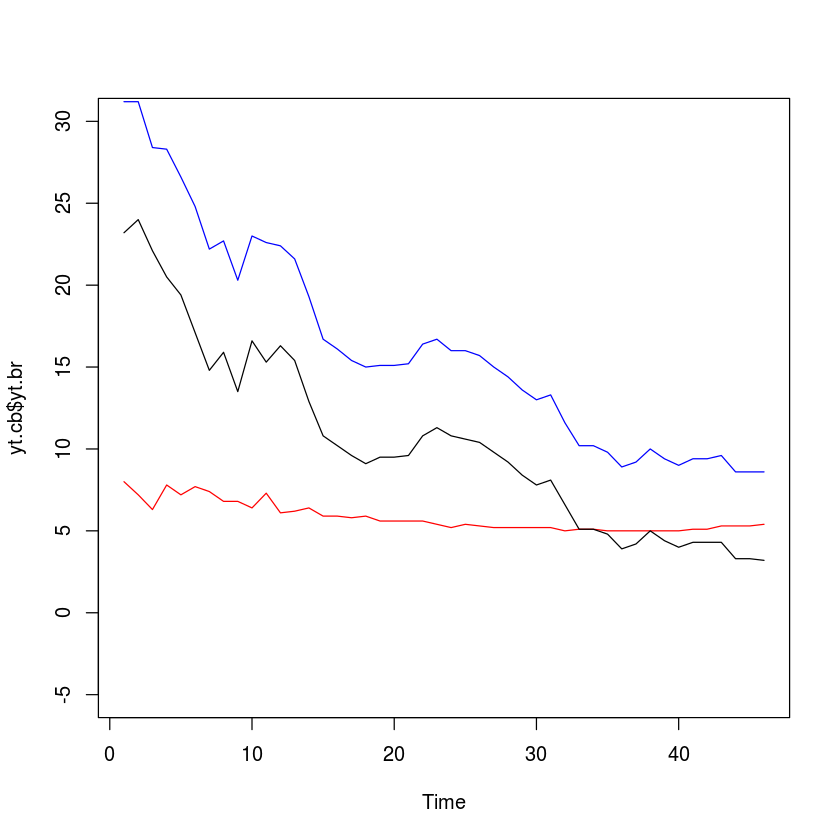

In [2]:
yt.br = ts(data$birth)
yt.dr = ts(data$death)
yt.re = ts(yt.br - yt.dr)
yt.cb = data.frame(cbind(yt.br,yt.dr, yt.re))
plot.ts(yt.cb$yt.br, col='blue',  ylim=c(-5,30))
lines(yt.cb$yt.dr, col='red')
lines(yt.cb$ yt.re, col='black')

# 이동평균법
이동 평균법을 사용해서 추세를 부드럽게 만들어 보자

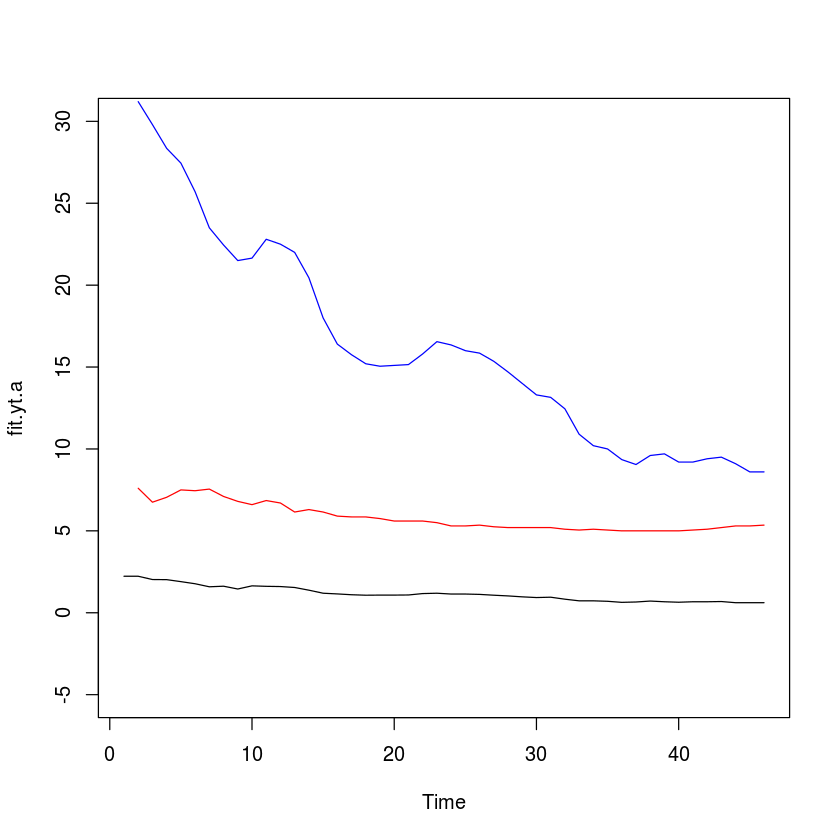

In [3]:
library(TTR)
yt.br = ts(data$birth)
yt.dr = ts(data$death)
yt.cb = data.frame(cbind(yt.br,yt.dr))
fit.yt.a = SMA(yt.cb$yt.br, n=2)
fit.yt.b = SMA(yt.cb$yt.dr, n=2)
fit.yt.c = filter(yt.cb$yt.br, rep(1/7/2), sides=1)  # 가중치 1/7, 관측치 2, 방법(1:이동평균법, 2:중심이동평균)
plot.ts(fit.yt.a, col='blue',  ylim=c(-5,30))
lines(fit.yt.b, col='red')
lines(fit.yt.c, col='black')

# 지수평활법

[1] "fitted"       "x"            "alpha"        "beta"         "gamma"       
[6] "coefficients" "seasonal"     "SSE"          "call"

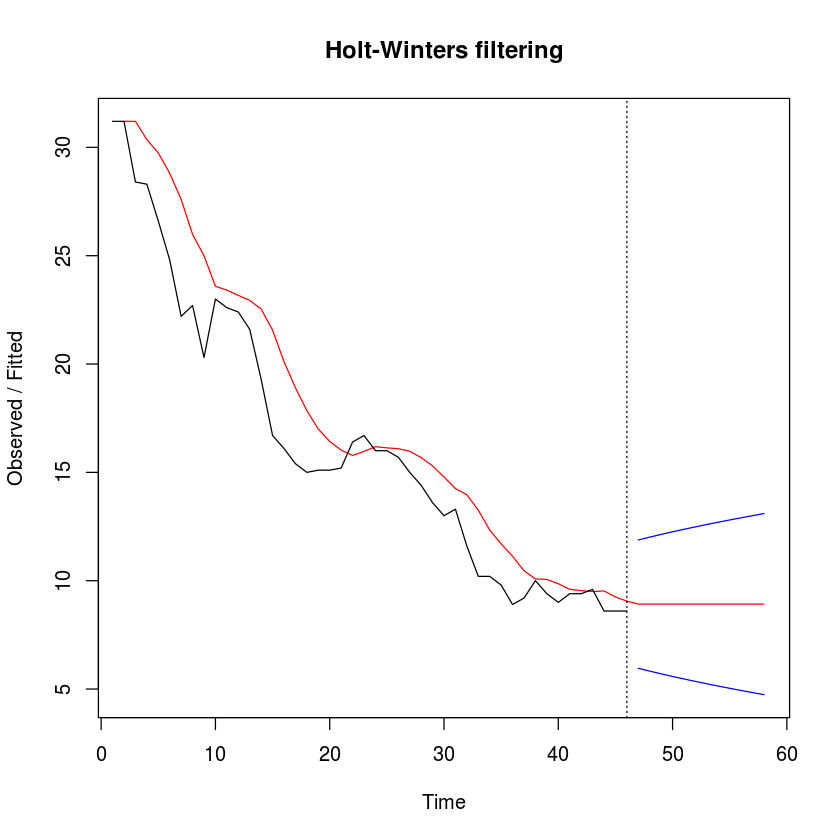

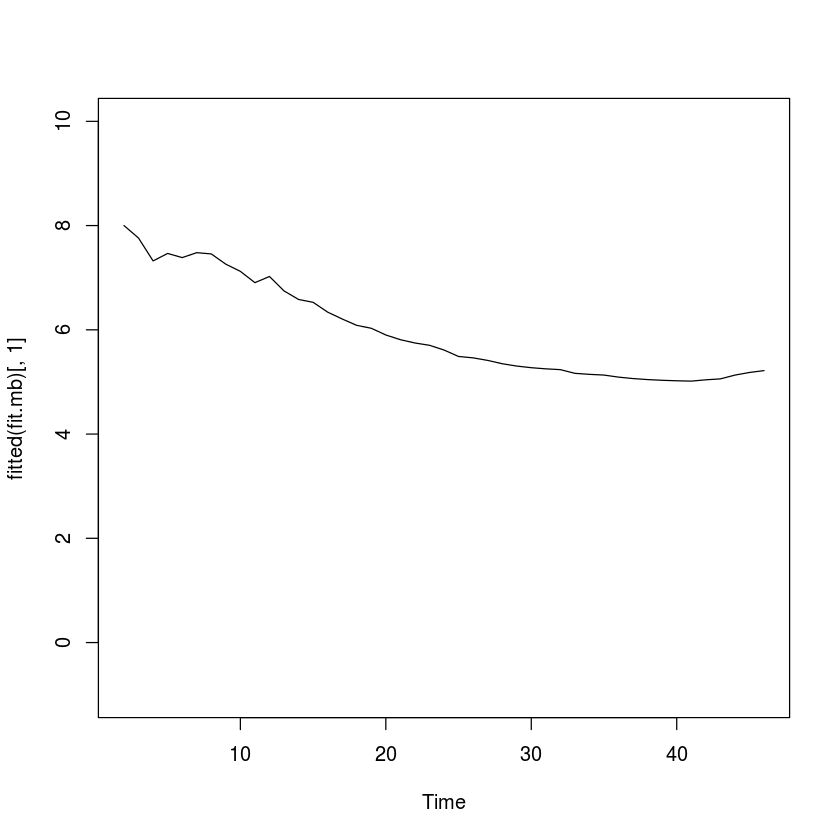

In [34]:
yt.br = ts(data$birth)
yt.dr = ts(data$death)
yt.cb = data.frame(cbind(yt.br,yt.dr))
fit.ma = HoltWinters(yt.cb$yt.br, gamma=F, beta=F, alpha=0.3)
fit.mb = HoltWinters(yt.cb$yt.dr, gamma=F, beta=F, alpha=0.3)
names(fit.mb)
# 예측한 데이터만 그려보기 
plot.ts(fitted(fit.mb)[,1], ylim=c(-1,10))
# 앞으로 12만큼 예측까지 포함하여 그려보기
pre = predict(fit.ma, n.ahead=12,prediction.interval=T)
plot(fit.ma, pre)



# 예측오차 MAD (Mean Absolute Deviation)

In [5]:
resi = fit.yt.a - yt.br
test = data.frame(cbind(fit.yt.a, yt.br, resi))
test = test$resi[!is.na(test$resi)]
mean(abs(test))

[1] 0.4044444

# 예측오차 MSE (Mean Square Error)

In [6]:
resi = fit.yt.a - yt.br
test = data.frame(cbind(fit.yt.a, yt.br, resi))
test = test$resi[!is.na(test$resi)]
mean(test^2)

[1] 0.3348889

# ARIMA

also installing the dependency ‘quadprog’

Warning message in install.packages("tseries"):
“installation of package ‘quadprog’ had non-zero exit status”Warning message in install.packages("tseries"):
“installation of package ‘tseries’ had non-zero exit status”Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


ERROR: Error in library(tseries): there is no package called ‘tseries’


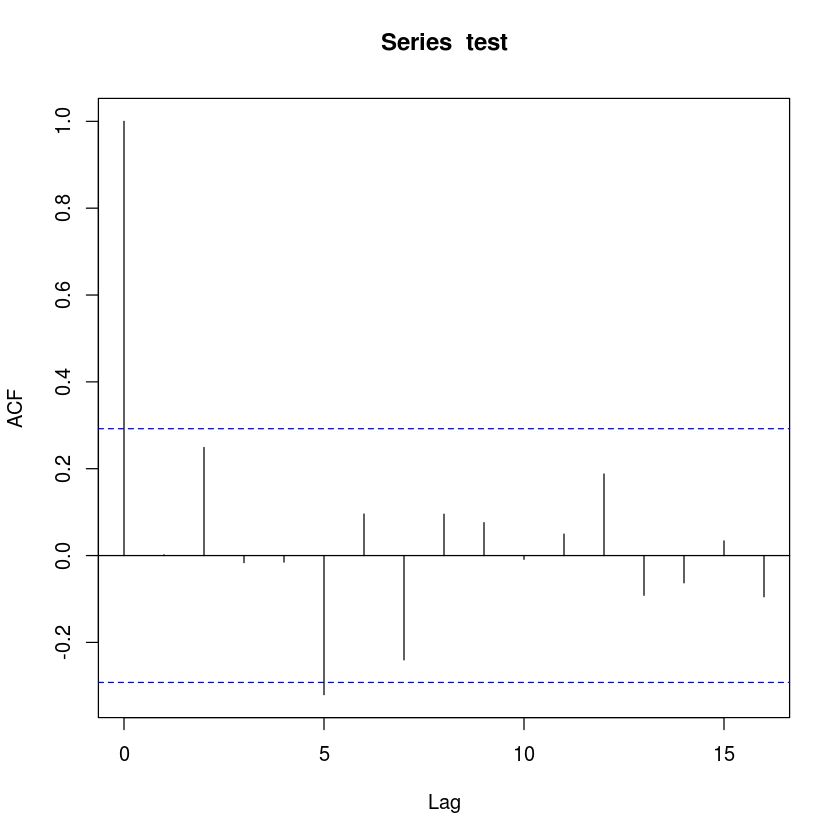

In [42]:
acf(test)
#install.packages("forecast")

# PCA + ARIMA

# Regression

# PCA + Regression

year,birth,death
1970,31.2,8.0
1971,31.2,7.2
1972,28.4,6.3
1973,28.3,7.8
1974,26.6,7.2
1975,24.8,7.7



Loadings:
      RC1    RC2    RC3   
year  -0.830 -0.466 -0.308
birth  0.640  0.523  0.563
death  0.454  0.839  0.301

                 RC1   RC2   RC3
SS loadings    1.304 1.194 0.502
Proportion Var 0.435 0.398 0.167
Cumulative Var 0.435 0.833 1.000


Call:
lm(formula = birth ~ year, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.7998 -1.2558  0.2832  0.8378  5.1077 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 931.7677    46.4340   20.07   <2e-16 ***
year         -0.4595     0.0233  -19.72   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.098 on 44 degrees of freedom
Multiple R-squared:  0.8983,	Adjusted R-squared:  0.896 
F-statistic: 388.8 on 1 and 44 DF,  p-value: < 2.2e-16


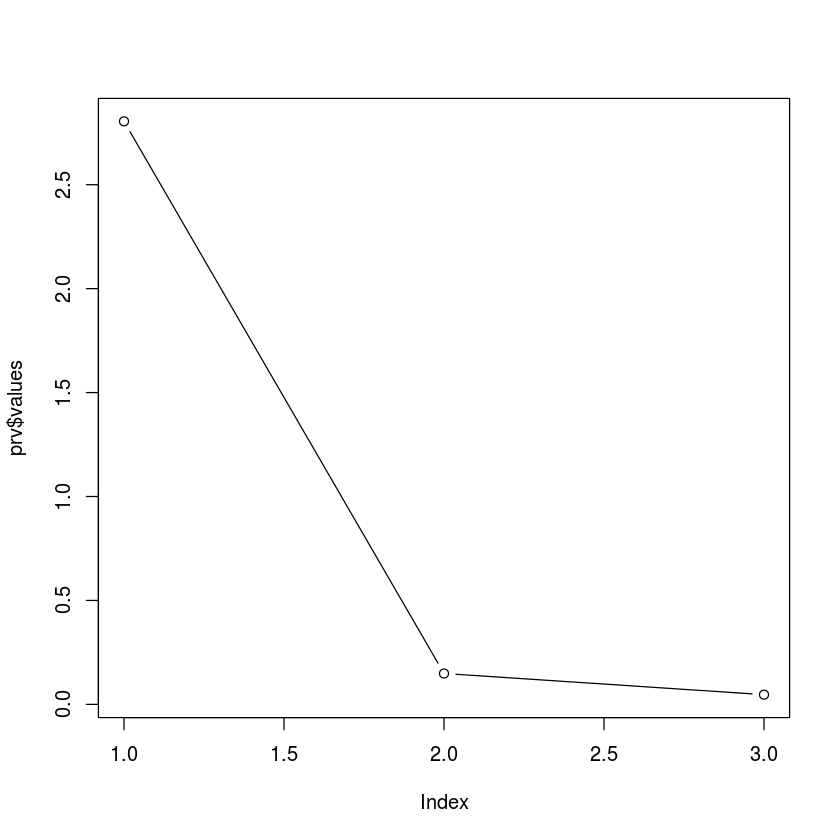

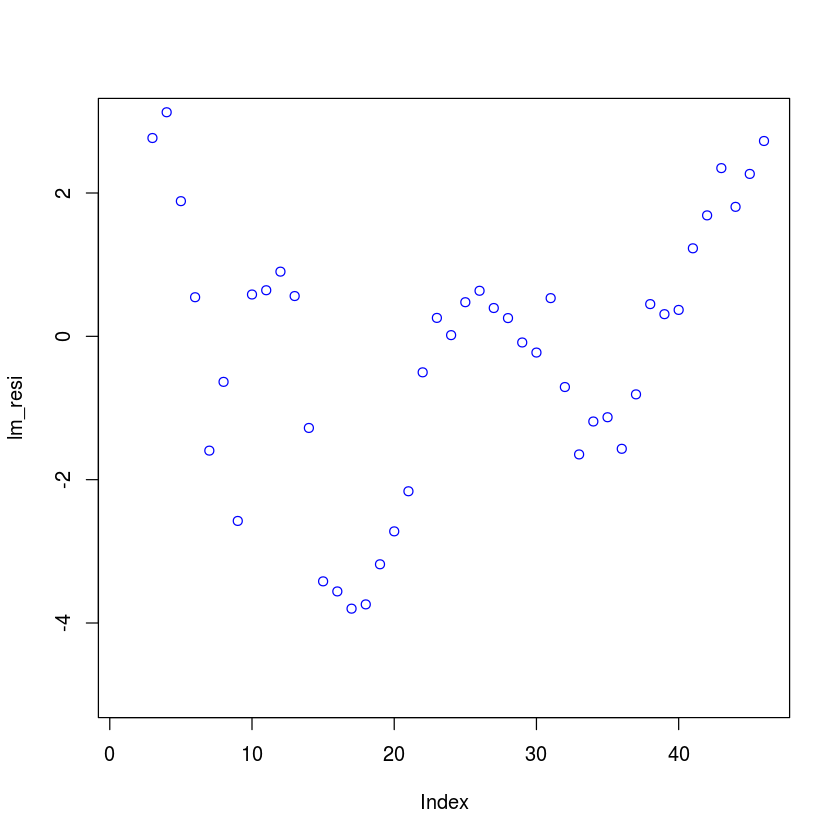

In [48]:
library(psych)
library(GPArotation)
data = read.csv("korea_birthrate.csv")
head(data)
prv<-principal(data, nfactors=3, rotate="varimax")
# 주성분 1개만 사용하면 될 듯 
plot(prv$values, type='b')
prv$loadings

# 회귀식 한번 만들어 보자 
lm_mm = lm(birth~year, data=data)
summary(lm_mm)
lm_fit = fitted(lm_mm)
lm_resi = data$birth - lm_fit
plot(lm_resi, ylim=c(-5,3), col='blue')

In [129]:
#install.packages("qdapTools")
# library(qdapTools)
# mydf = data.frame(info=c('a','b','c'))
# mydf
# mtabulate(mydf$Info)
# cbind(mydf, mtabulate(strsplit(mydf$Info, ", ")))
#install.packages("onehot")
library(onehot)
mydf = data.frame(info=c('a','b','c'))
encoder <- onehot(mydf)
encoder


[1] "info"

# 정규성 검정

year,birth,death
1970,31.2,8.0
1971,31.2,7.2
1972,28.4,6.3
1973,28.3,7.8
1974,26.6,7.2
1975,24.8,7.7


[1] "statistic" "p.value"   "method"    "data.name"


	Shapiro-Wilk normality test

data:  sqrt(data$birth)
W = 0.92727, p-value = 0.00674


ERROR: Error in xy.coords(x, y, xlabel, ylabel, log): 'x' is a list, but does not have components 'x' and 'y'


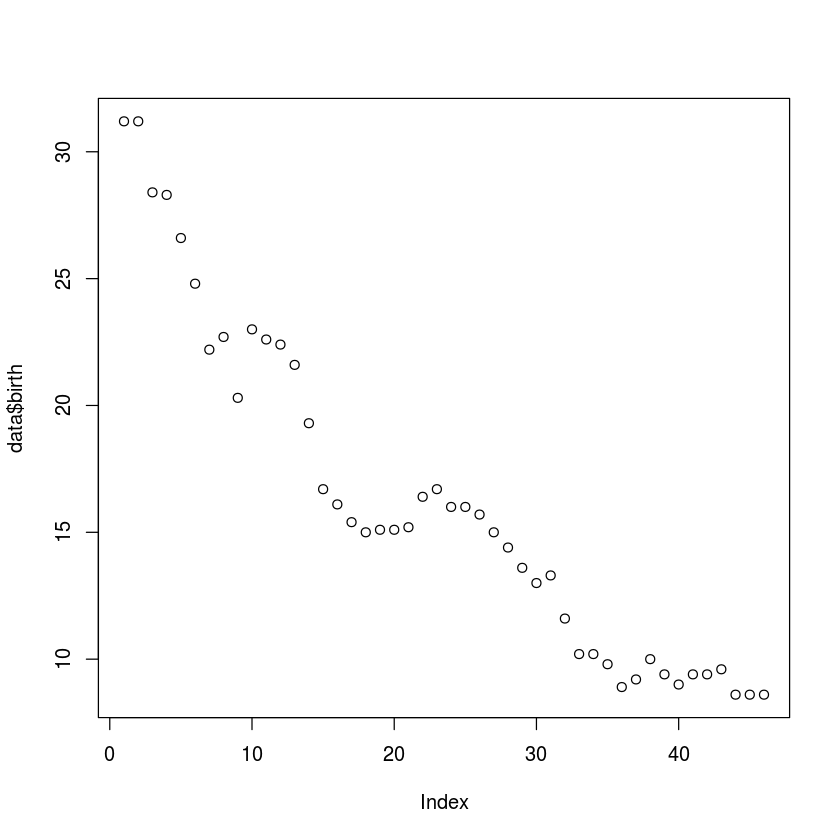

In [72]:
setwd("/home/dev/R_study_jupyter/data")
data = read.csv("korea_birthrate.csv")
head(data)
plot(data$birth)
# 0.05 보다 크면 정규성 만족
sm = shapiro.test(sqrt(data$birth))
names(sm)
sm
plot(sm)
# log
# sqrt
